# Mushroom Dataset

## 1) Data preprocessing

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from matplotlib.lines import Line2D  

In [3]:
df = pd.read_csv('mushroom_dataset.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


# Cleaning Data

In [4]:
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [5]:
missing_roots = df[df['stalk-root'].isnull()]

In [6]:
missing_roots.groupby('habitat').count()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,poisonous
habitat,,,,,,,,,,,,,,,,,,,,,
d,656,656,656,656,656,656,656,656,656,656,...,656,656,656,656,656,656,656,656,656,656
g,288,288,288,288,288,288,288,288,288,288,...,288,288,288,288,288,288,288,288,288,288
l,768,768,768,768,768,768,768,768,768,768,...,768,768,768,768,768,768,768,768,768,768
p,576,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,576
w,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192


### Seems like the missing values on roots are a posibility since mushroom can wrong in different places, like leafes, for this missing we are going to be creating a new letter = not possible to grow roots

In [7]:
df['stalk-root'] = df['stalk-root'].fillna('m')

In [8]:
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
poisonous                   0
dtype: int64

### We changed the missing values in the column 'stalk-root' to the letter 'm' which means the mushroom is unable to grow roots, since this is a posibility

In [9]:
df.duplicated().sum()

0

### No dups in the dataset

## Visualization of each features

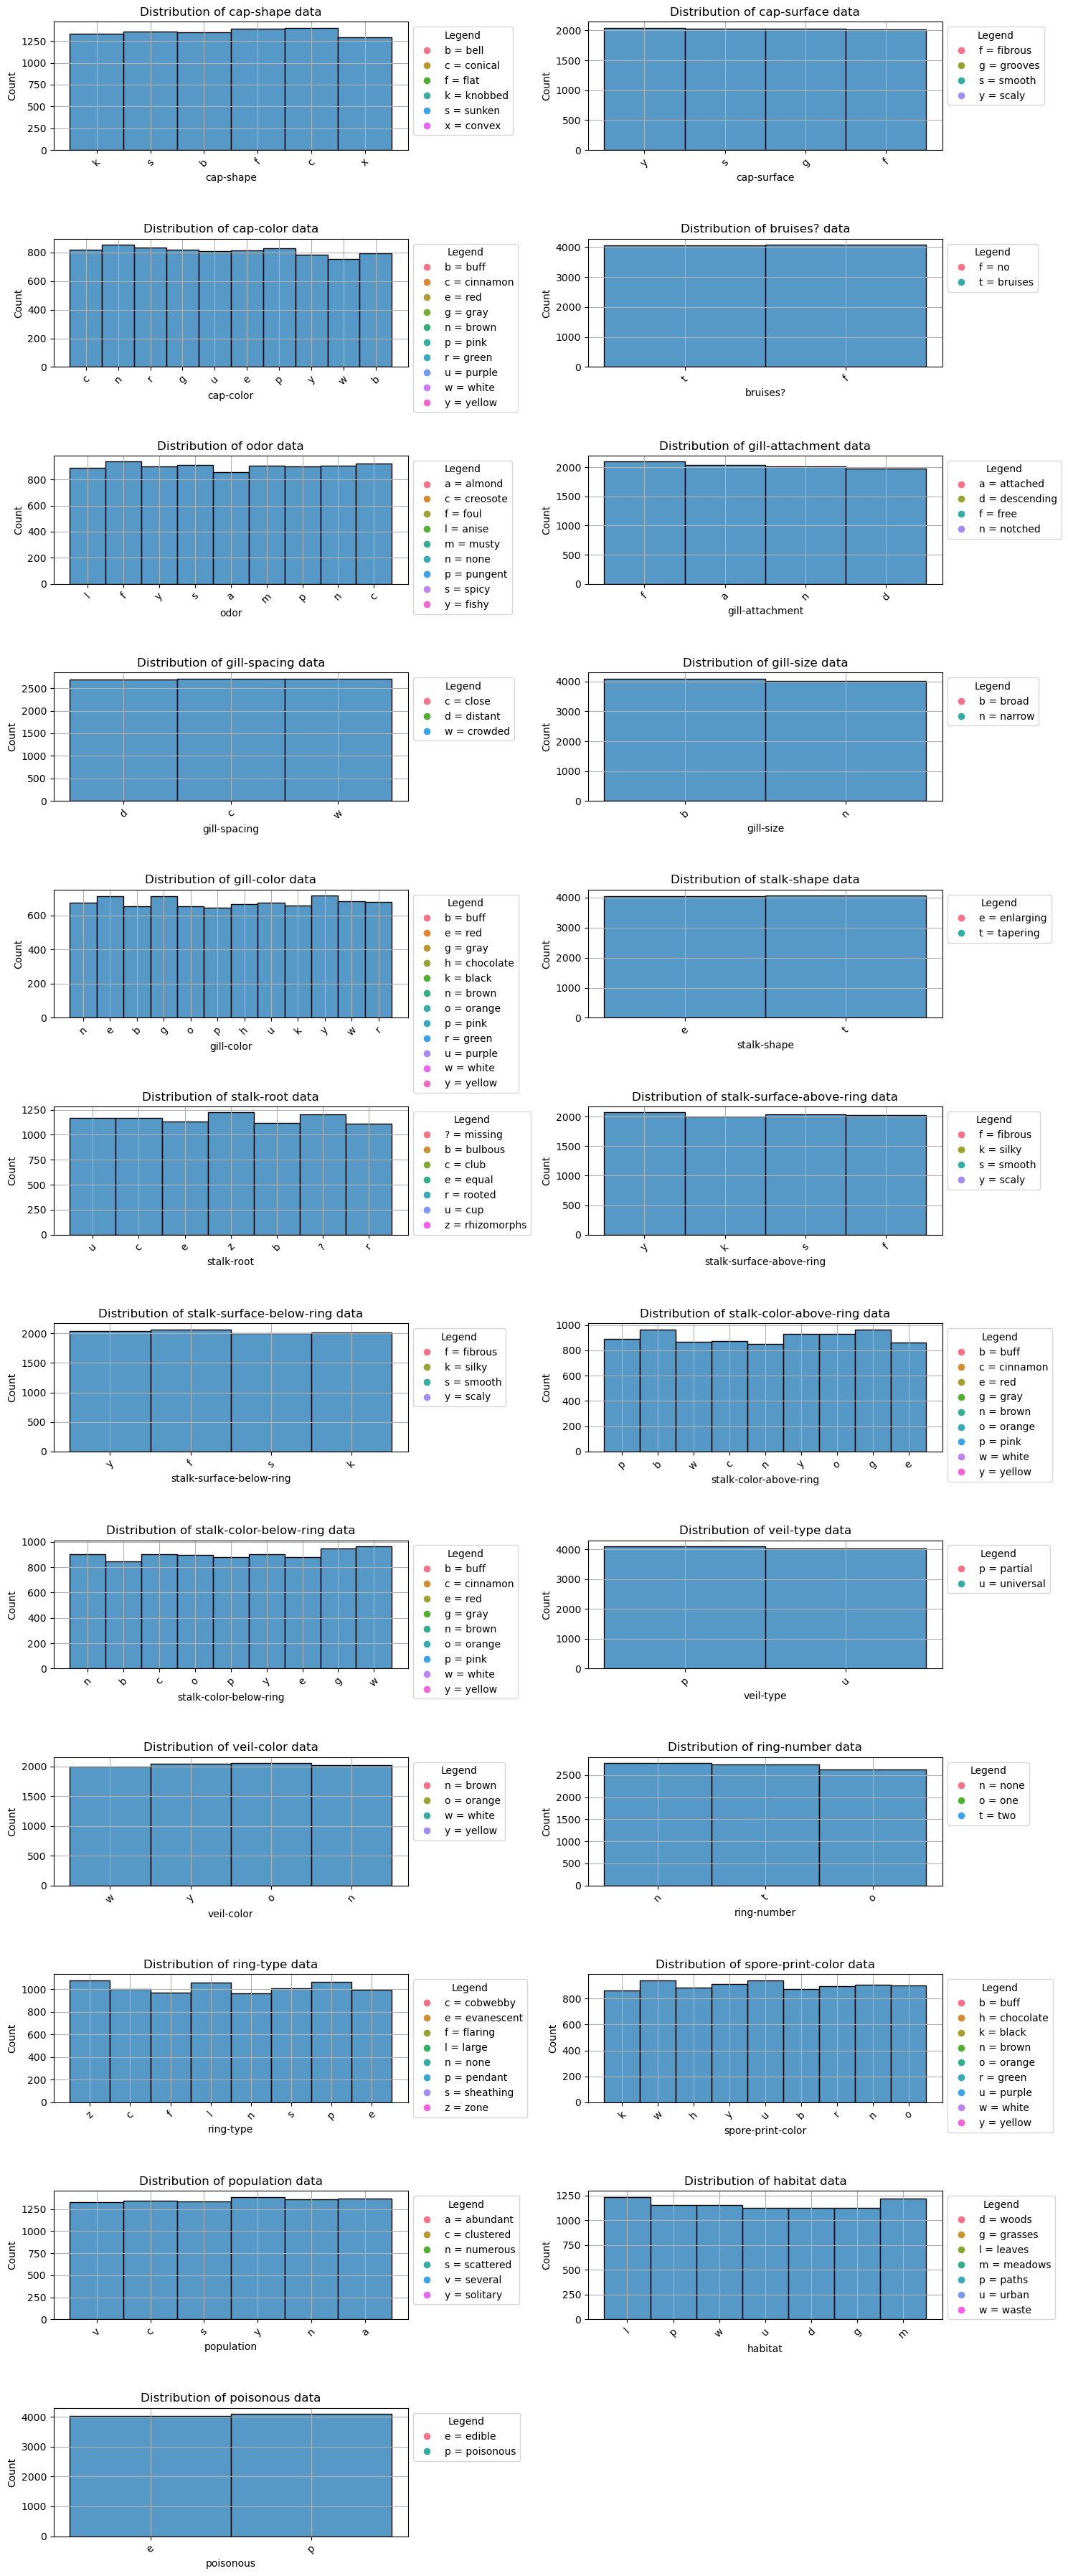

In [10]:
category_mappings = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 
                  'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises?': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 
             'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray',
                   'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 
                   'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 
                   'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 
                               'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 
                               'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 
                  'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 
                          'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 
                   'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 
                'u': 'urban', 'w': 'waste', 'd': 'woods'},
    'poisonous': {'e':'edible',  'p':'poisonous'}
}


np.random.seed(0)

if 'df' in locals() or 'df' in globals():
    num_rows = len(df)  
else:
    num_rows = 100  


df_hist  = pd.DataFrame({
    col: np.random.choice(list(mapping.keys()), num_rows)  
    for col, mapping in category_mappings.items()
})


num_cols = len(df_hist.columns)
rows = (num_cols // 2) + (num_cols % 2)

plt.figure(figsize=(15, rows * 3))

for i, col in enumerate(df_hist.columns, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(x=df_hist[col], multiple='dodge')
    plt.title(f'Distribution of {col} data')
    plt.xticks(rotation=45)
    plt.grid(True)

    #
    unique_values = sorted(df_hist[col].unique())
    colors = sns.color_palette('husl', len(unique_values))
    legend_patches = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=8,
               label=f'{val} = {category_mappings[col].get(val, "Unknown")}')
        for val, c in zip(unique_values, colors)
    ]

    plt.legend(handles=legend_patches, title='Legend', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


# Encoding 

### We choose to use Label Encoding since One-hot will be creating a lot of columns and Ordinal encoding gives hierarchy

In [11]:
df_encoded = df.copy()

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,5,5,0,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,11,0,...,5,5,0,0,1,4,0,4,2,0
8121,2,2,4,0,5,0,0,0,5,0,...,5,5,0,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1


In [13]:
df_encoded.groupby('poisonous').size()

poisonous
0    4208
1    3916
dtype: int64

# Export the encoded data as CSV

In [14]:
df_encoded.to_csv('preprocessing_mushroom.csv', index= False)

# Try different classification models to the experimentation process

In [15]:
df_model = pd.read_csv('preprocessing_mushroom.csv')
df_model

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,5,5,0,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,11,0,...,5,5,0,0,1,4,0,4,2,0
8121,2,2,4,0,5,0,0,0,5,0,...,5,5,0,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1


In [16]:
#Find a correlation
corr = df_model.corr()
corr

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
bruises,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.223439,0.235794,NaN,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


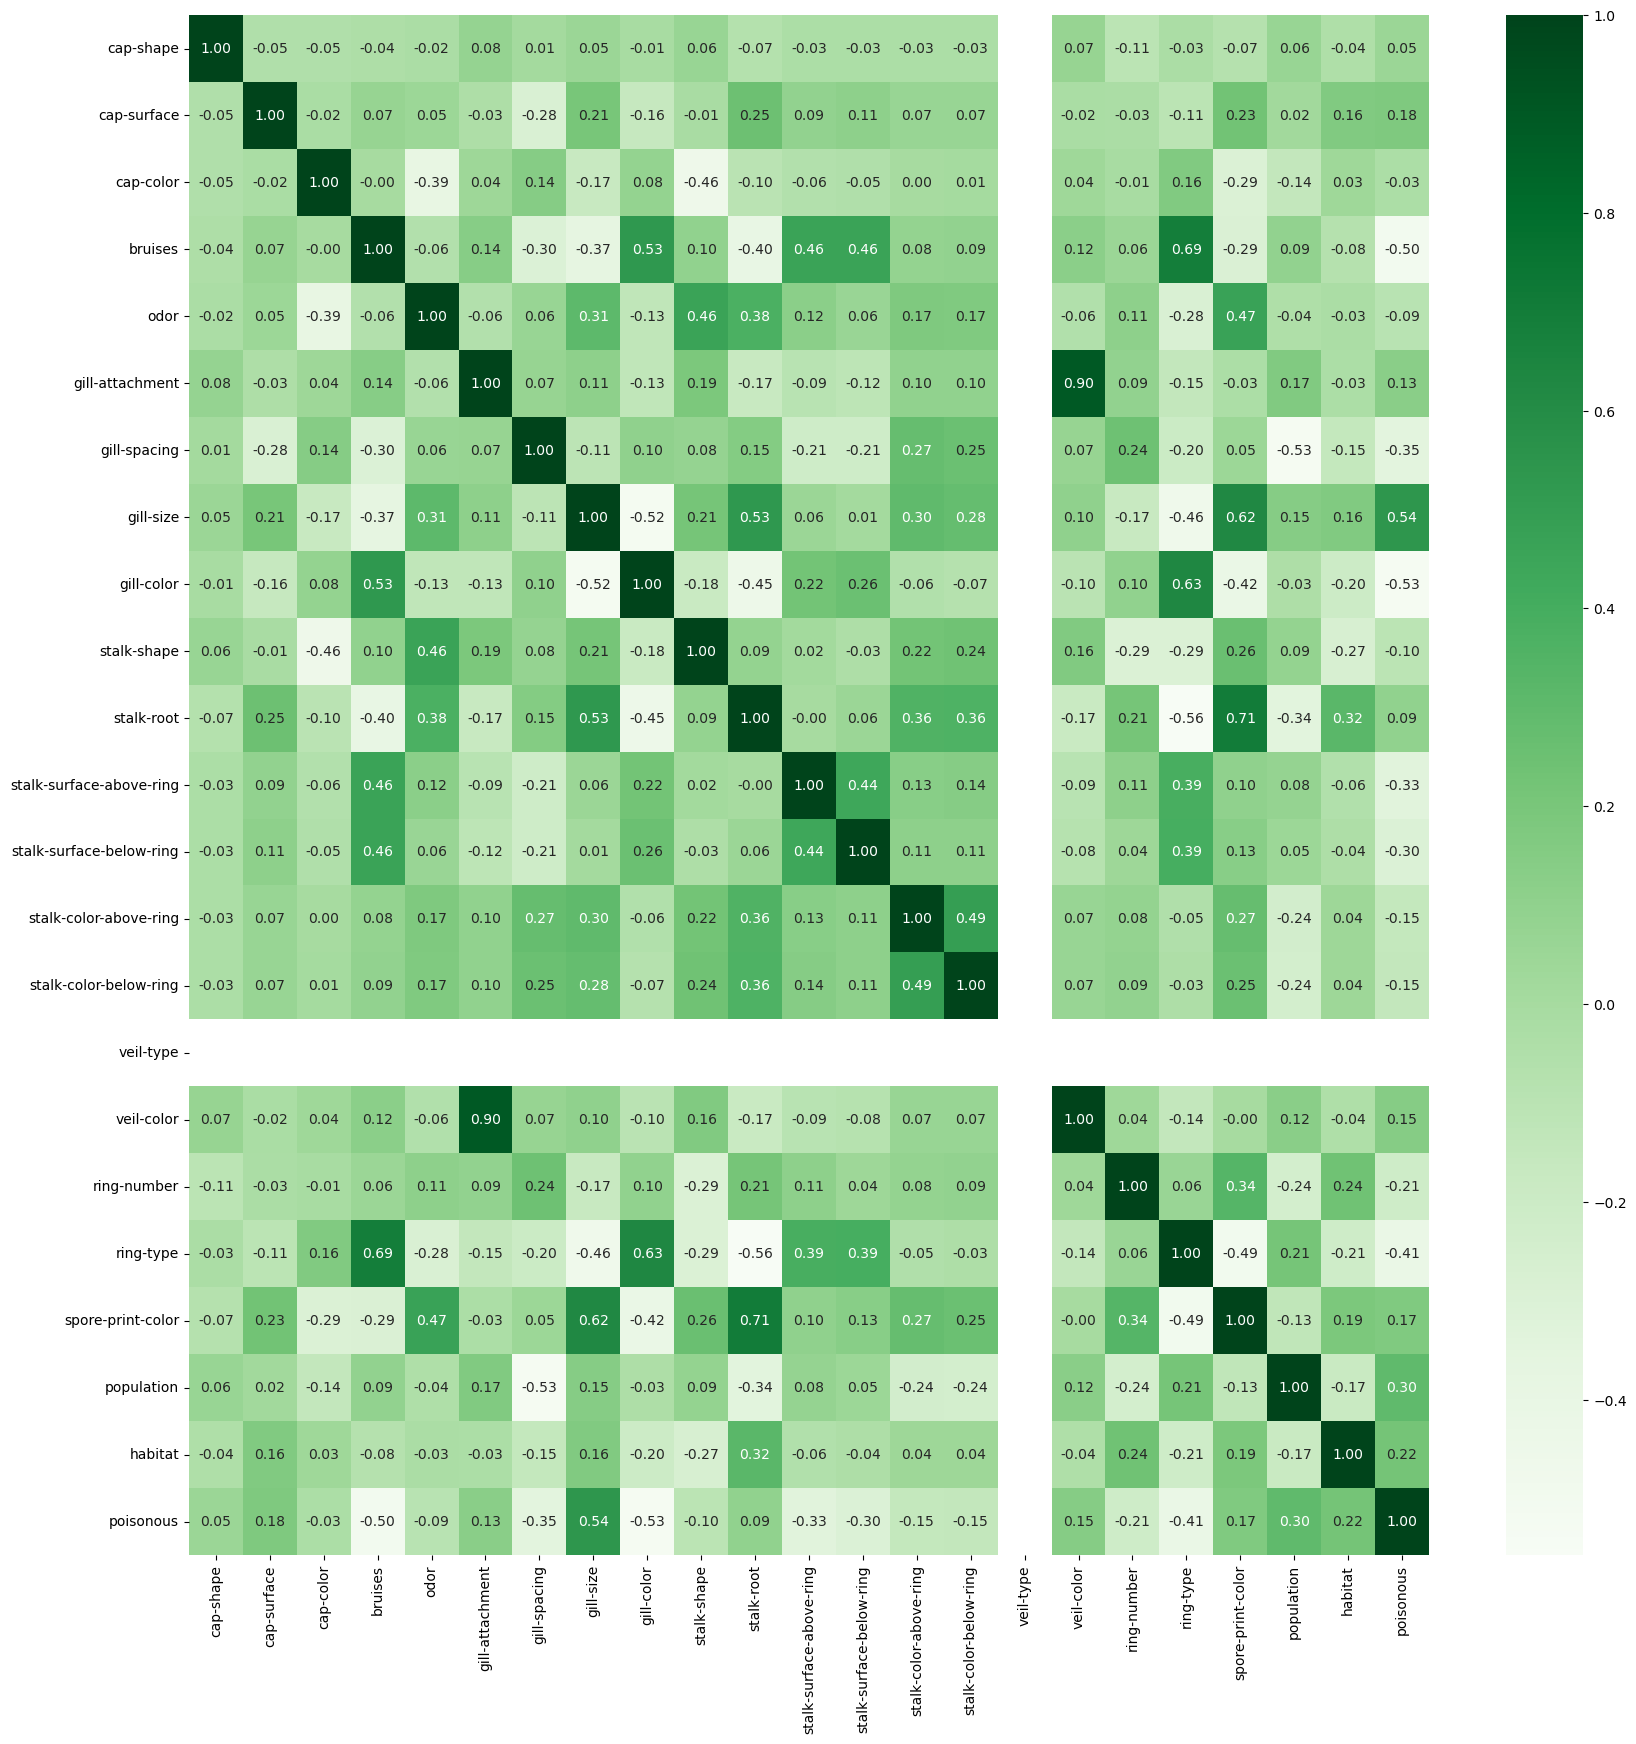

In [17]:
plt.figure(figsize=(20, 20))

sns.heatmap(corr, cmap='Greens', annot=True, fmt='.2f')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [18]:
corr_pairs = corr.unstack().sort_values(key=abs, ascending=False)

strong_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

print(strong_pairs.head(20))  

gill-attachment    veil-color           0.897518
veil-color         gill-attachment      0.897518
spore-print-color  stalk-root           0.705408
stalk-root         spore-print-color    0.705408
bruises            ring-type            0.692973
ring-type          bruises              0.692973
gill-color         ring-type            0.629398
ring-type          gill-color           0.629398
gill-size          spore-print-color    0.622991
spore-print-color  gill-size            0.622991
ring-type          stalk-root          -0.557202
stalk-root         ring-type           -0.557202
poisonous          gill-size            0.540024
gill-size          poisonous            0.540024
gill-color         poisonous           -0.530566
poisonous          gill-color          -0.530566
gill-spacing       population          -0.529253
population         gill-spacing        -0.529253
bruises            gill-color           0.527120
gill-color         bruises              0.527120
dtype: float64


### According to the correlation heatmap, gill-attachment and veil-color has a hiest correlation.

In [19]:
#Divide target feature and others for Machine learning
X = df_model.drop('poisonous', axis=1)
Y = df_model['poisonous']

In [20]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## PCA

In [21]:
#Feacture scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

print(X_pca[:5])

[[ 0.25213354 -1.59876022  0.18045832  0.10139802 -1.53519007 -0.60246032
   1.46390153  0.71996388  1.45321236  0.35056462]
 [-1.77921594 -0.49601463  1.00156141 -1.06286136 -1.56411609 -1.93007306
   0.92209829  0.20810592 -0.45166937  0.4532473 ]
 [-1.30148406 -1.13514094  1.45499457 -0.84319671 -1.72438288 -0.78459899
  -1.84349649  0.10587009  0.62571071  0.85911727]
 [ 0.03901823 -1.5315478   0.54887583 -0.02989699 -2.20519054 -1.316969
   1.25969517  0.78607655  0.62101431  0.21897626]
 [ 1.635084   -0.05806769  1.11970291 -2.18716312  1.6633679  -0.34686512
   0.8659412   1.31595906 -1.08191821  1.44059648]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


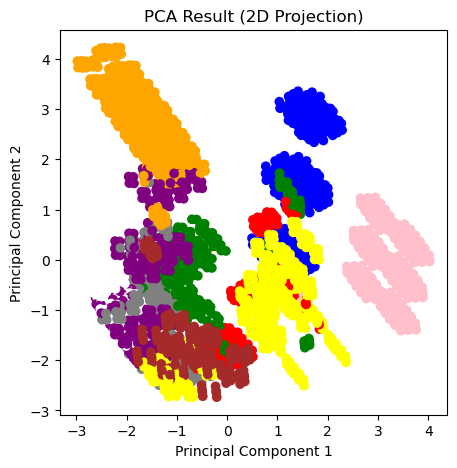

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=5)
X_clustered = kmeans.fit_predict(X_scaled)

LABEL_COLOR_MAP = {0 : 'red',         # 'rgb(255, 0, 0)' -> 'red'
                   1 : 'white',       # 'rgb(255, 255, 255)' -> 'white'
                   2 : 'pink',        # 'rgb(255, 192, 203)' -> 'pink'
                   3 : 'orange',      # 'rgb(255, 165, 0)' -> 'orange'
                   4 : 'yellow',      # Example
                   5 : 'green',       # Example
                   6 : 'blue',        # Example
                   7 : 'purple',      # Example
                   8 : 'brown',       # Example
                   9 : 'gray'}        # Example


label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]  # X_clustered はクラスタリング結果

plt.figure(figsize=(5, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label_color)  # cに色のリストを渡す
plt.title("PCA Result (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [24]:
# 各主成分の寄与率
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 累積寄与率
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)


Explained Variance Ratio: [0.2037041  0.12412968 0.11071335 0.10109774 0.08169483 0.06025791
 0.04662984 0.04250063 0.03639516 0.03072487]
Cumulative Explained Variance: [0.2037041  0.32783378 0.43854713 0.53964487 0.6213397  0.68159761
 0.72822745 0.77072808 0.80712324 0.83784811]


# Preparing for machine learning

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 前処理の確認
print(f"\n training data: {X_train.shape}")
print(f"test data: {X_test.shape}")



 training data: (6499, 22)
test data: (1625, 22)


In [28]:
def evaluate_model(model, name, X_train, X_test, y_train, y_test):
    
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()
    y_train_copy = y_train.copy()
    y_test_copy = y_test.copy()
    
    
    model.fit(X_train_copy, y_train_copy)
    
    
    train_pred = model.predict(X_train_copy)
    test_pred = model.predict(X_test_copy)
    
    
    train_accuracy = accuracy_score(y_train_copy, train_pred)
    test_accuracy = accuracy_score(y_test_copy, test_pred)
    
    
    cv_scores = cross_val_score(model, X_train_copy, y_train_copy, cv=5)

    
    
   
    print(f"\n===== {name} model  =====")
    print(f"training accuracy: {train_accuracy:.4f}")
    print(f"test accuracy: {test_accuracy:.4f}")
    print(f"cross validation mean）: {cv_scores.mean():.4f}")
    print(f"cross validation std: {cv_scores.std():.4f}")
    
    
    overfitting = train_accuracy - test_accuracy > 0.05
    print(f"Judging overfitting: {'High Possibility of Overfitting' if overfitting else 'Low Possibility of Overfitting'}")
    
    
    conf_matrix = confusion_matrix(y_test_copy, test_pred)
    print(f'confusion matlix:{conf_matrix}')
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not poison', 'Poison'], yticklabels=['Not poison', 'poison'])
    plt.ylabel('Actual')
    plt.xlabel('Predict')
    plt.title(f'{name} - confusion matlix')
    plt.tight_layout()
    plt.show()
    
    
    print("\nclassification report:")
    print(classification_report(y_test_copy, test_pred))
    
    return model, train_accuracy, test_accuracy

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

## Logistic Regrression

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


===== LogisticRegression model  =====
training accuracy: 0.9654
test accuracy: 0.9600
cross validation mean）: 0.9634
cross validation std: 0.0047
Judging overfitting: Low Possibility of Overfitting
confusion matlix:[[803  40]
 [ 25 757]]


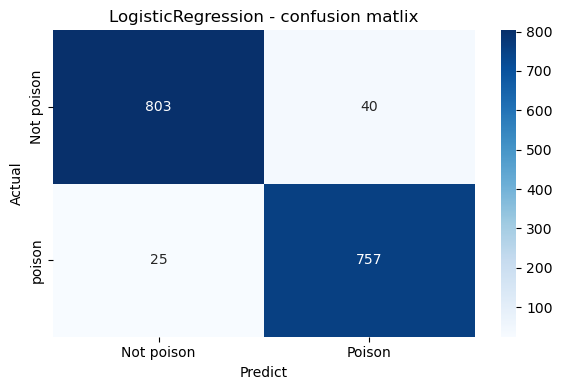


classification report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       843
           1       0.95      0.97      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

lr_model = LogisticRegression(C=1.0, max_iter=1000, random_state=42)

lr_model, lr_train_acc, lr_test_acc = evaluate_model(lr_model, 'LogisticRegression', X_train, X_test, y_train, y_test)


In [93]:
diff_df = pd.DataFrame({'Actual' : Y_test, 'Predicted': y_pred})
diff_df

,Actual,Predicted
2853,0,0
1031,1,1
5891,1,1
7325,0,0
7138,1,1
...,...,...
1165,0,0
6084,1,1
4818,1,1
5000,1,1


## Rogistic Regression insight

The accuracy score is about 95%. I wonder this model is overfitting, but training accuracy and test accuracy is almost same and using cross validation, it show about 95% mean accuracy. Therefore, this model accuracy is high and not overfitting.

## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier


===== Random Forest model  =====
training accuracy: 1.0000
test accuracy: 1.0000
cross validation mean）: 1.0000
cross validation std: 0.0000
Judging overfitting: Low Possibility of Overfitting
confusion matlix:[[843   0]
 [  0 782]]


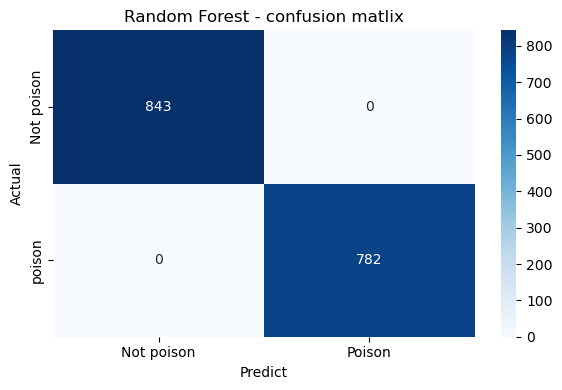


classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [34]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

rf_model, rf_train_acc, rf_test_acc = evaluate_model(rf_model, 'Random Forest', X_train, X_test, y_train, y_test)

In [41]:
print("train data class distribution:")
print(y_train.value_counts())
print("test data class distribution:")
print(y_test.value_counts())

print("train data class summary statistics:")
print(pd.DataFrame(X_train).describe())
print("test data class summary statistics")
print(pd.DataFrame(X_test).describe())


train data class distribution:
poisonous
0    3365
1    3134
Name: count, dtype: int64
test data class distribution:
poisonous
0    843
1    782
Name: count, dtype: int64
train data class feature:
                 0             1             2             3             4   \
count  6.499000e+03  6.499000e+03  6.499000e+03  6.499000e+03  6.499000e+03   
mean   2.104623e-17 -3.498595e-17  7.653176e-18  3.061270e-17 -1.421304e-17   
std    1.000077e+00  1.000077e+00  1.000077e+00  1.000077e+00  1.000077e+00   
min   -2.106834e+00 -1.491346e+00 -1.765521e+00 -8.422372e-01 -1.971857e+00   
25%   -8.563371e-01 -1.491346e+00 -5.911371e-01 -8.422372e-01 -1.020476e+00   
50%   -2.310888e-01  1.369207e-01 -1.996759e-01 -8.422372e-01  4.065949e-01   
75%    1.019408e+00  9.510540e-01  1.366169e+00  1.187314e+00  4.065949e-01   
max    1.019408e+00  9.510540e-01  1.757630e+00  1.187314e+00  1.833666e+00   

                 5             6            7             8             9   \
count  6.4990

## Random Forest 2: More hard restrictions


===== Random Forest model  =====
training accuracy: 0.9898
test accuracy: 0.9914
cross validation mean）: 0.9895
cross validation std: 0.0022
Judging overfitting: Low Possibility of Overfitting
confusion matlix:[[843   0]
 [ 14 768]]


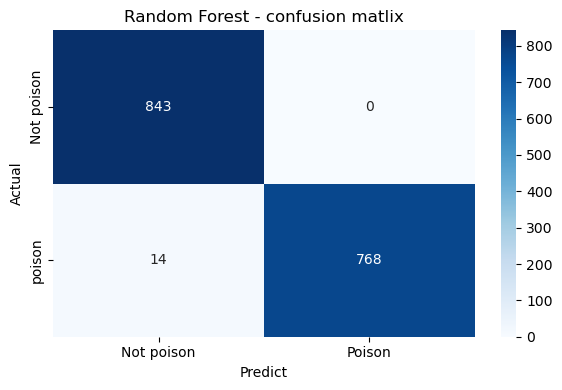


classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       843
           1       1.00      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [42]:

rf_model = RandomForestClassifier( 
    n_estimators=50,     
    max_depth=5,         
    min_samples_split=10,  
    min_samples_leaf=8,   
    max_features='sqrt',  
    bootstrap=True,      
    random_state=42
)

rf_model, rf_train_acc, rf_test_acc = evaluate_model(rf_model, 'Random Forest', X_train, X_test, y_train, y_test)


In [100]:
results_diff = pd.DataFrame({'Actual': Y_test1, 'Predicted':Y_rf_pred})
results_diff

,Actual,Predicted
2853,0,0
1031,1,1
5891,1,1
7325,0,0
7138,1,1
...,...,...
1165,0,0
6084,1,1
4818,1,1
5000,1,1


### According to Random Forest, it show 100% accuracy score, it seems like overfitting, but training and test accuracy score is almost same. And Even if looking at class distribution and  summary statistics, no data bias was found.

# Decision Tree


===== Decision Tree model  =====
training accuracy: 0.9800
test accuracy: 0.9766
cross validation mean）: 0.9806
cross validation std: 0.0036
Judging overfitting: Low Possibility of Overfitting
confusion matlix:[[814  29]
 [  9 773]]


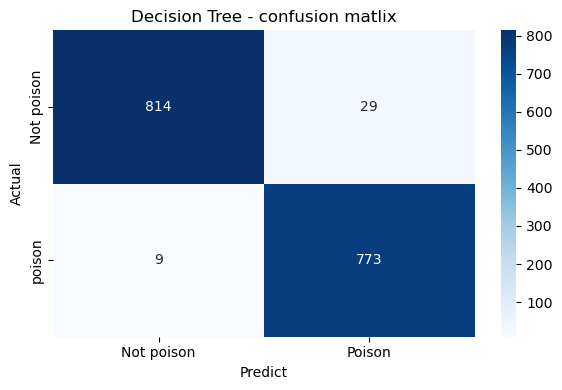


classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       843
           1       0.96      0.99      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [45]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_model, dt_train_acc, dt_test_acc = evaluate_model(dt_model, 'Decision Tree', X_train, X_test, y_train, y_test)

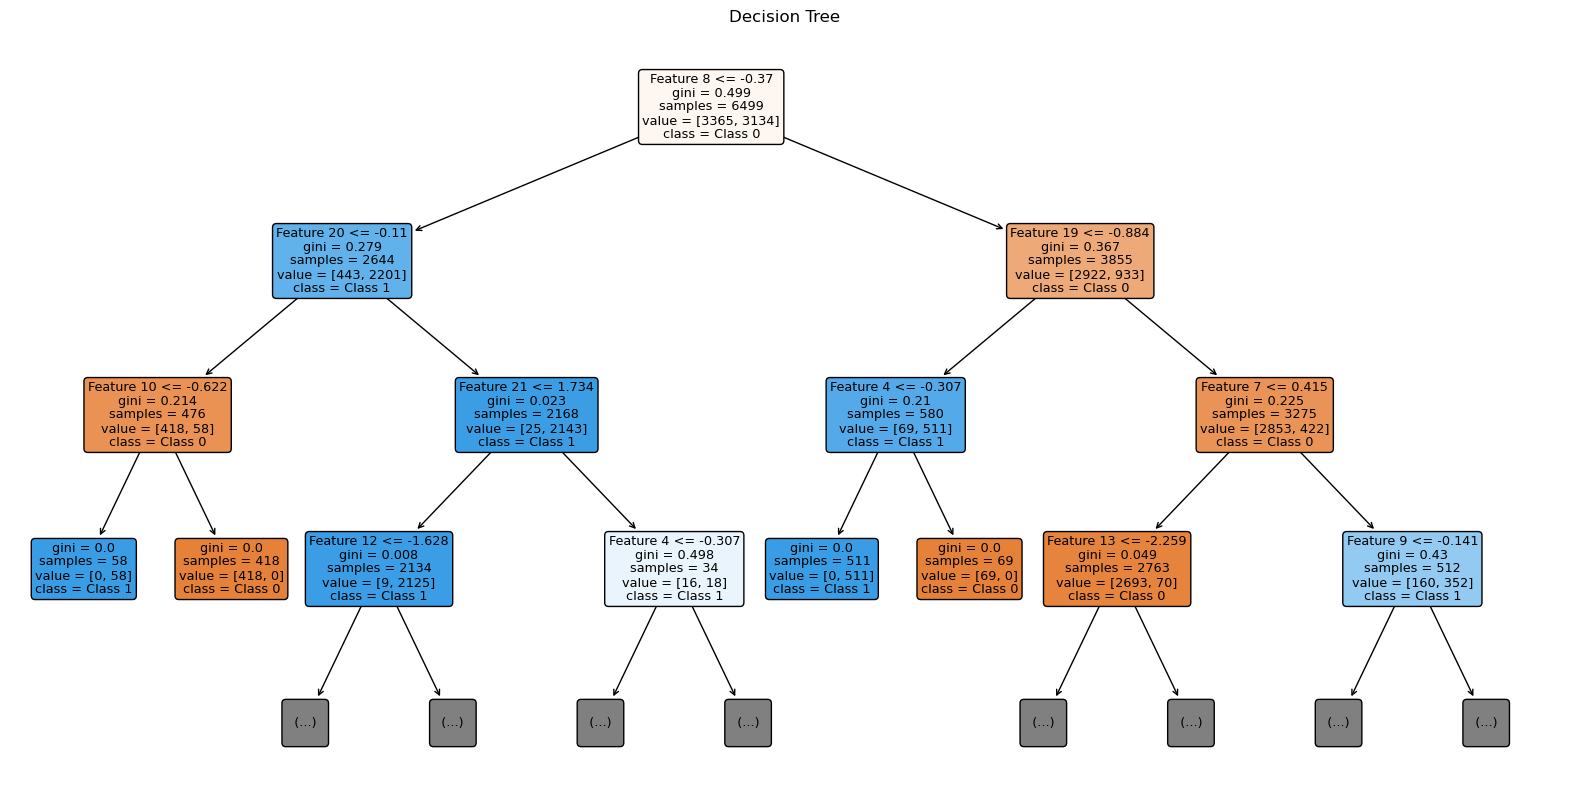

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])], 
          class_names=['Class 0', 'Class 1'], rounded=True, max_depth=3)
plt.title('Decision Tree')
plt.show()

## XGBoost

In [109]:
!pip install --upgrade xgboost

In [50]:
import xgboost as xgb


===== XGBoost model  =====
training accuracy: 1.0000
test accuracy: 1.0000
cross validation mean）: 1.0000
cross validation std: 0.0000
Judging overfitting: Low Possibility of Overfitting
confusion matlix:[[843   0]
 [  0 782]]


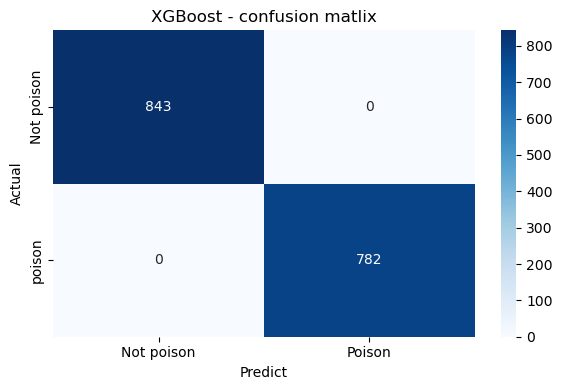


classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [51]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model, xgb_train_acc, xgb_test_acc = evaluate_model(xgb_model, 'XGBoost', X_train, X_test, y_train, y_test)

In [54]:
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'Logistic Regression']
train_accuracies = [dt_train_acc, rf_train_acc, xgb_train_acc, lr_train_acc]
test_accuracies = [dt_test_acc, rf_test_acc, xgb_test_acc, lr_test_acc]

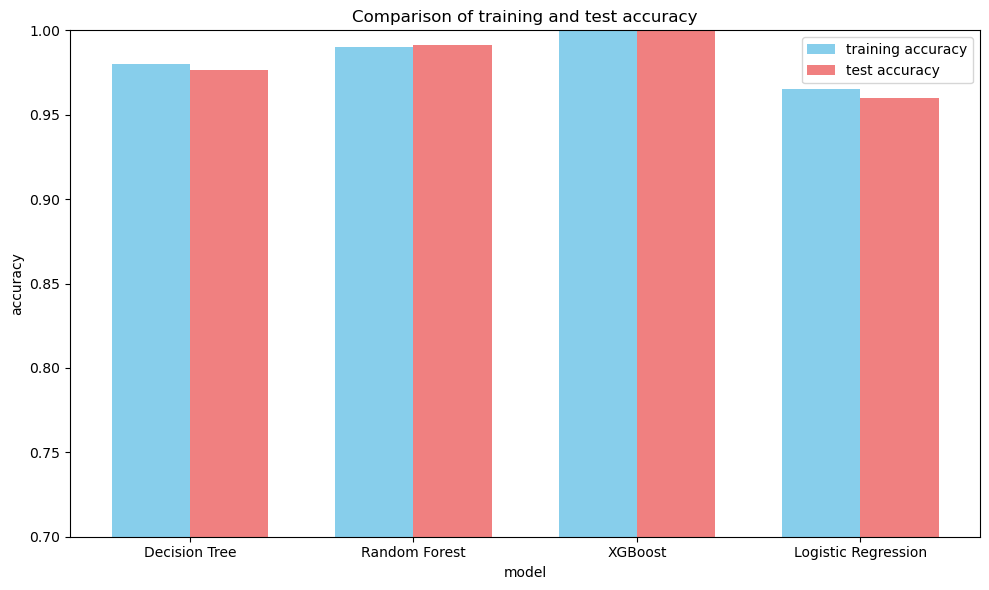

In [58]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, train_accuracies, bar_width, label='training accuracy', color='skyblue')
plt.bar(index + bar_width, test_accuracies, bar_width, label='test accuracy', color='lightcoral')

plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('Comparison of training and test accuracy')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.ylim(0.7, 1.0)  
plt.tight_layout()
plt.show()


In [62]:
importances = xgb_model.feature_importances_

#Sort the feature importances in the descending order of Gini importance
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

                     Feature  Gini Importance
8                 gill-color         0.274745
20                population         0.135183
7                  gill-size         0.112810
19         spore-print-color         0.078356
4                       odor         0.070139
5            gill-attachment         0.066003
18                 ring-type         0.046002
9                stalk-shape         0.041605
13    stalk-color-above-ring         0.038787
10                stalk-root         0.027858
3                    bruises         0.019195
12  stalk-surface-below-ring         0.015705
1                cap-surface         0.013867
6               gill-spacing         0.012823
17               ring-number         0.012794
21                   habitat         0.012641
2                  cap-color         0.007239
14    stalk-color-below-ring         0.006275
11  stalk-surface-above-ring         0.005690
0                  cap-shape         0.002283
16                veil-color      

In [66]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(xgb_model, threshold=0.04)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

print(f"original feature: {X_train.shape[1]}")
print(f"selected feature: {X_train_selected.shape[1]}")

original feature: 22
selected feature: 8


/var/folders/cw/q2_zn8097n96yvm89xkz_xbm0000gn/T/ipykernel_1167/2889796101.py:8: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  plt.tight_layout()
/var/folders/cw/q2_zn8097n96yvm89xkz_xbm0000gn/T/ipykernel_1167/2889796101.py:8: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.
  plt.tight_layout()
/var/folders/cw/q2_zn8097n96yvm89xkz_xbm0000gn/T/ipykernel_1167/2889796101.py:8: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/sit

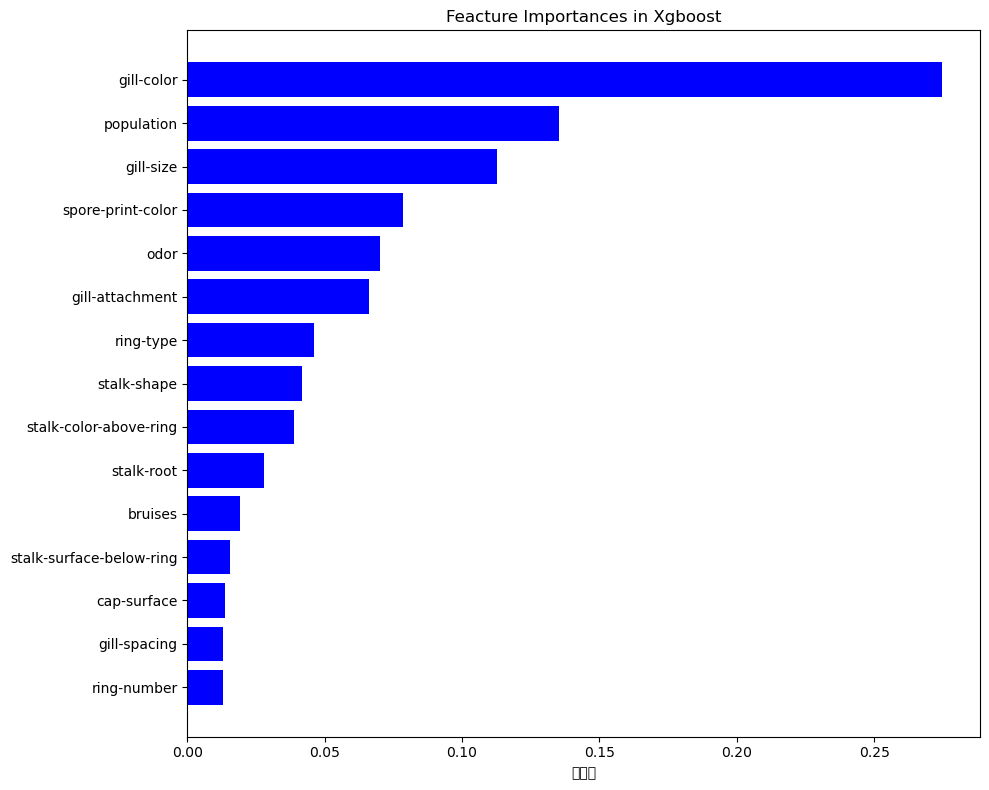

In [68]:
 indices = np.argsort(importances)[-15:]  # 上位15個の特徴量
    
plt.figure(figsize=(10, 8))
plt.title(f'Feacture Importances in Xgboost')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('重要度')
plt.tight_layout()
plt.show()

# Grid Search

In [69]:
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0]
}

grid_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='auc'),
                           param_grid, cv=5, scoring='accuracy')
grid_xgb.fit(X_train_selected, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 1.0]},
             scoring='accuracy')

In [72]:
grid_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
best_model = grid_xgb.best_estimator_
Y_xgb_grid_pred = best_model.predict(X_test)

In [75]:
print(f"Best parameter: {grid_xgb.best_params_}")
print(f"best accuracy: {grid_xgb.best_score_:.4f}")

Best parameter: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
best accuracy: 0.9965


# Conclusion

## Characteristics of the dataset
- Certain features (e.g. smell, gill color, etc.) are strongly correlated with toxicity in this mushroom dataset.


## Optimal model

The optimal models in this case are considered to be XGboost and random forest, which resulted in nearly 100% accuracy. Suspecting over-learning, we compared training and test accuracy scores and finally looked at the statistics in detail, but no significant bias was observed, so over-learning is unlikely. Also, since the original paper also showed 100% model performance, this data set is considered to be highly trainable.

In [76]:
pwd

'/Users/hina/[301] Machine Learning/Lab/ds_301_mid_term_project'